In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

# For division



C:\Users\misra\Documents\final anaconda3 download\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
from __future__ import division

In [3]:
tech_list=['AAPL','GOOG','MSFT','AMZN']
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [4]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,1889.735179,1852.244942,1871.015218,1872.337074,4.106387e+06,1872.337074
std,130.292277,121.755968,124.300093,126.338422,2.057888e+06,126.338422
min,1725.000000,1626.030029,1641.510010,1676.609985,8.813000e+05,1676.609985
25%,1793.770020,1762.680054,1778.010010,1784.030029,2.763400e+06,1784.030029
50%,1871.319946,1827.349976,1842.010010,1855.319946,3.486200e+06,1855.319946
75%,1943.640015,1900.310059,1925.000000,1918.189941,4.893600e+06,1918.189941
max,2461.000000,2386.050049,2416.610107,2408.189941,1.556730e+07,2408.189941


In [5]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-04-22 to 2020-04-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    int64  
 5   Adj Close  253 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


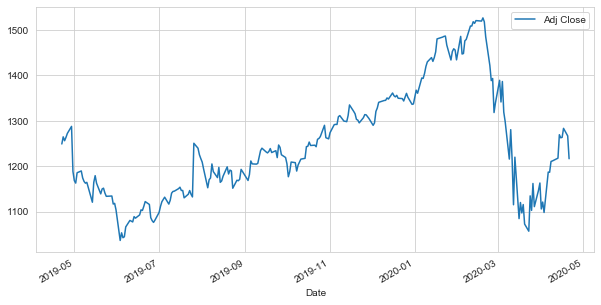

In [6]:
GOOG['Adj Close'].plot(legend=True,figsize=(10,5))

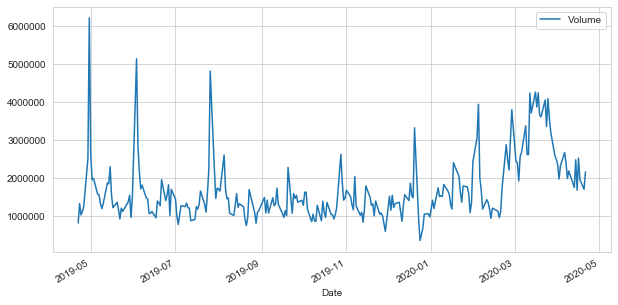

In [7]:
GOOG['Volume'].plot(legend=True,figsize=(10,5))

In [8]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    GOOG[column_name] = pd.Series(GOOG['Adj Close']).rolling(window=ma).mean()

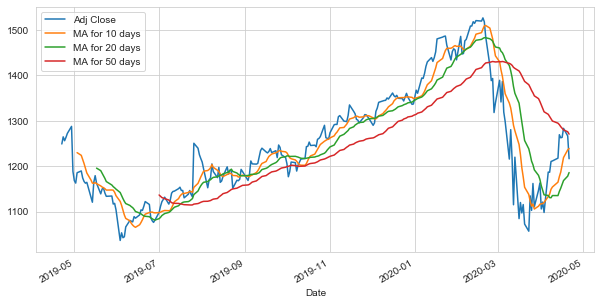

In [9]:
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,5))

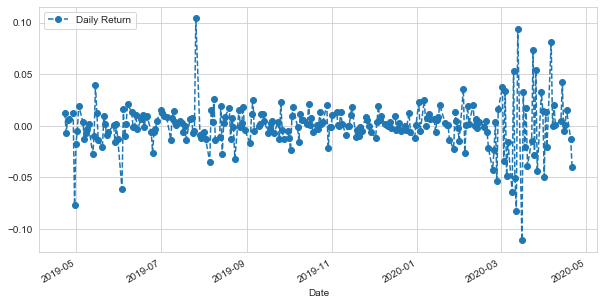

In [10]:
GOOG['Daily Return']=GOOG['Adj Close'].pct_change()
GOOG['Daily Return'].plot(figsize=(10,5),legend=True,linestyle='--',marker='o')

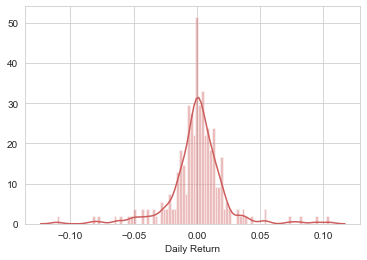

In [11]:
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='indianred')

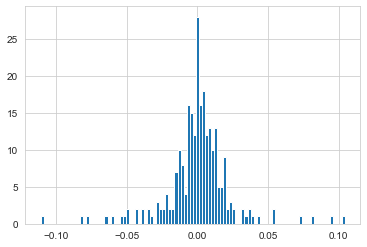

In [12]:
GOOG['Daily Return'].hist(bins=100)

In [13]:
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [14]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-22,201.887497,1248.839966,122.143959,1887.310059
2019-04-23,204.799362,1264.550049,123.802032,1923.770020
2019-04-24,204.483505,1256.000000,123.377647,1901.750000
2019-04-25,202.627808,1263.449951,127.463577,1902.250000
2019-04-26,201.660461,1272.180054,128.193909,1950.630005


In [15]:
tech_rets=closing_df.pct_change()

In [16]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-22,NaN,NaN,NaN,NaN
2019-04-23,0.014423,0.012580,0.013575,0.019318
2019-04-24,-0.001542,-0.006761,-0.003428,-0.011446
2019-04-25,-0.009075,0.005931,0.033117,0.000263
2019-04-26,-0.004774,0.006910,0.005730,0.025433


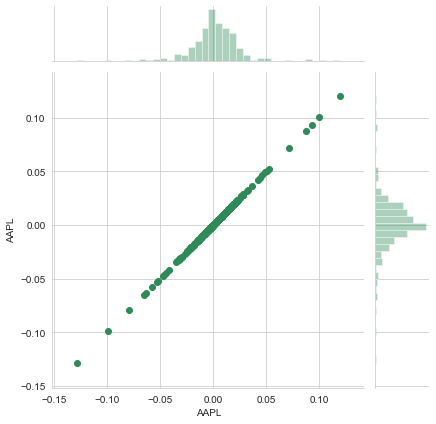

In [17]:
sns.jointplot('AAPL','AAPL',tech_rets,kind='scatter',color='seagreen')

C:\Users\misra\Documents\final anaconda3 download\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


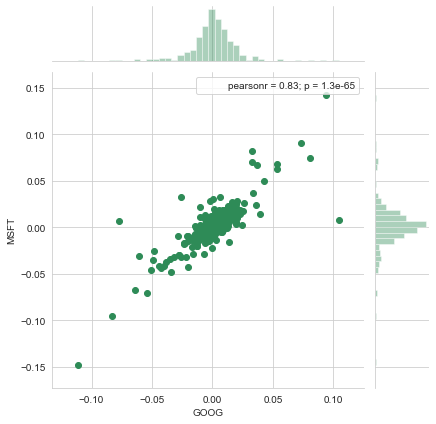

In [18]:
from scipy.stats import pearsonr
sns.jointplot('GOOG','MSFT', tech_rets, kind="scatter", color='seagreen', stat_func=pearsonr)

In [19]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-22,NaN,NaN,NaN,NaN
2019-04-23,0.014423,0.012580,0.013575,0.019318
2019-04-24,-0.001542,-0.006761,-0.003428,-0.011446
2019-04-25,-0.009075,0.005931,0.033117,0.000263
2019-04-26,-0.004774,0.006910,0.005730,0.025433


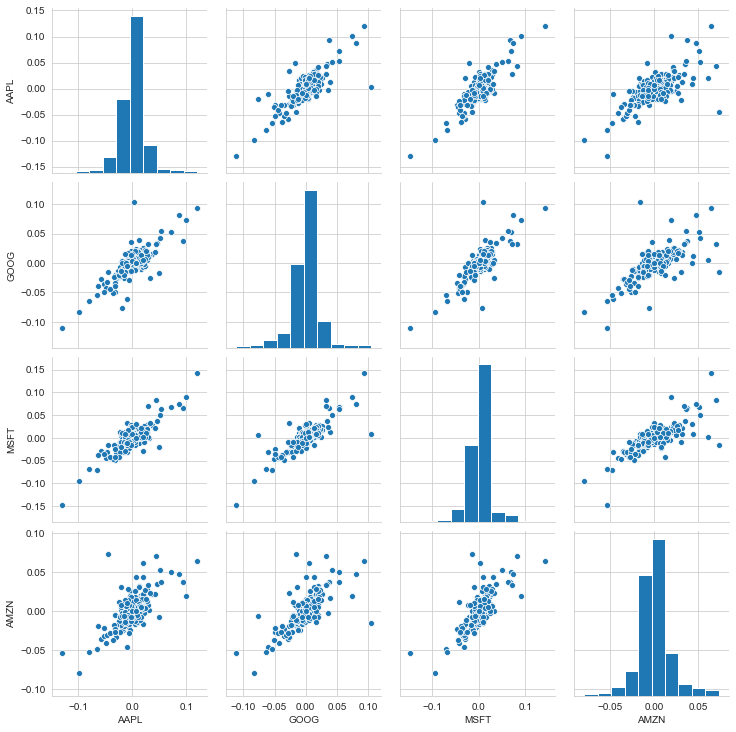

In [20]:
sns.pairplot(tech_rets.dropna())

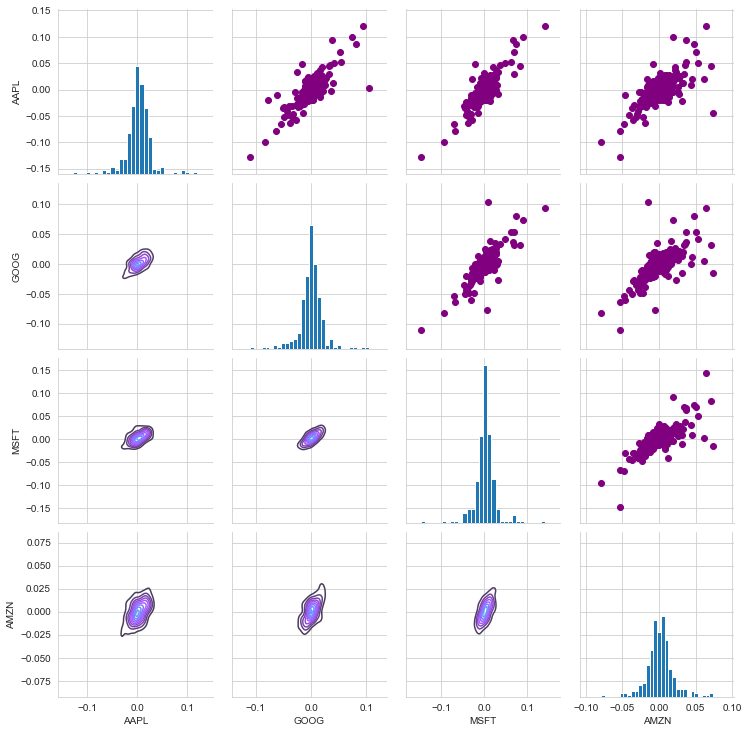

In [21]:
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

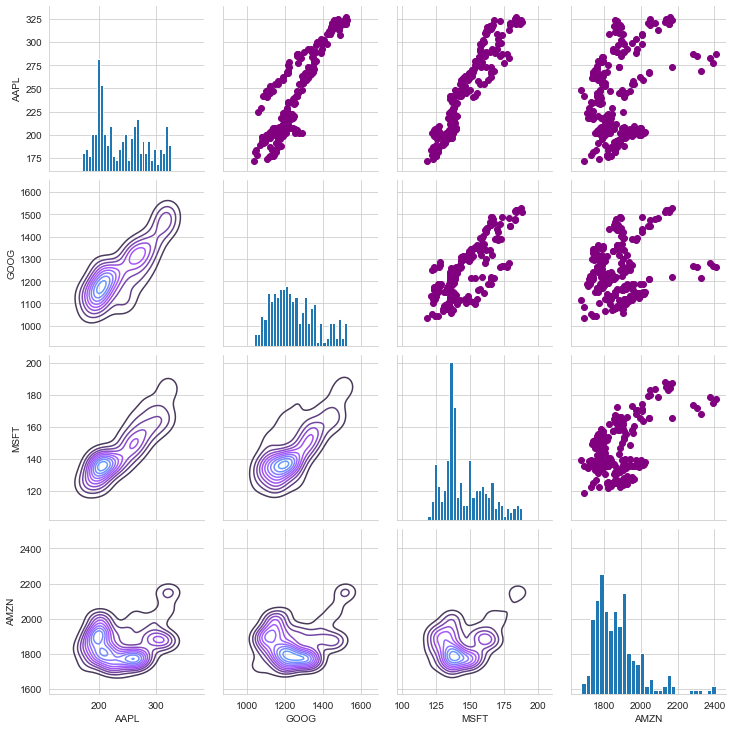

In [22]:
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

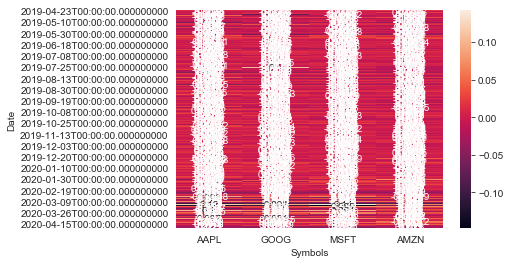

In [23]:
sns.heatmap(tech_rets.dropna(),annot=True)

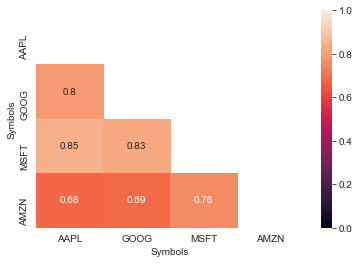

In [24]:
corr = tech_rets.corr()
 
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
#mask heatmap, annotate and normalize color
sns.heatmap(corr, mask=mask, vmin=0, vmax=1,annot=True)

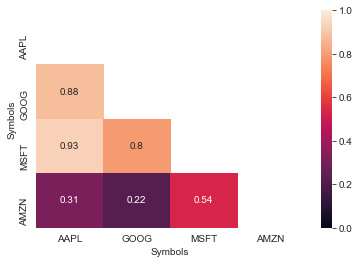

In [25]:
corr2 = closing_df.corr()
 
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
#mask heatmap, annotate and normalize color
sns.heatmap(corr2, mask=mask, vmin=0, vmax=1,annot=True)

Risk Analysis

In [26]:
rets=tech_rets.dropna()

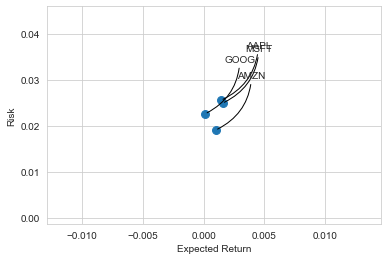

In [27]:
area=np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', color='black', connectionstyle = 'arc3, rad= -.3'))

Bootstrap method

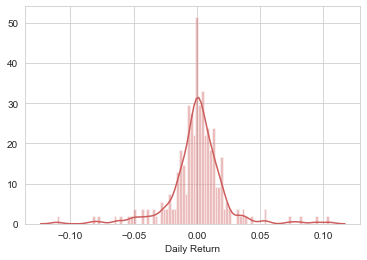

In [28]:
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='indianred')

In [29]:
rets['GOOG'].quantile(0.05)

-0.03653258472867073

In [30]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-23,0.014423,0.012580,0.013575,0.019318
2019-04-24,-0.001542,-0.006761,-0.003428,-0.011446
2019-04-25,-0.009075,0.005931,0.033117,0.000263
2019-04-26,-0.004774,0.006910,0.005730,0.025433
2019-04-29,0.001517,0.012105,-0.000924,-0.006254


In [31]:
days=365
dt=1/days
mu=rets.mean()['GOOG']

sigma=rets.std()['GOOG']


In [32]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [33]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2019-04-22,1249.089966,1228.310059,1235.989990,1248.839966,807300,1248.839966,NaN,NaN,NaN,NaN
2019-04-23,1269.000000,1246.380005,1250.689941,1264.550049,1319900,1264.550049,NaN,NaN,NaN,0.012580
2019-04-24,1268.010010,1255.000000,1264.119995,1256.000000,1018800,1256.000000,NaN,NaN,NaN,-0.006761
2019-04-25,1267.407959,1252.030029,1264.770020,1263.449951,1107300,1263.449951,NaN,NaN,NaN,0.005931
2019-04-26,1273.069946,1260.319946,1269.000000,1272.180054,1241400,1272.180054,NaN,NaN,NaN,0.006910


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

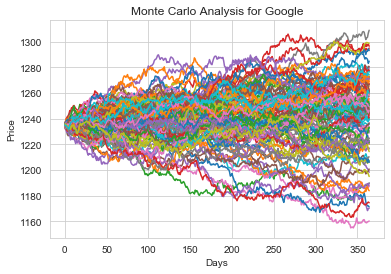

In [34]:
start_price=1235
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [35]:
runs=10000
simulations=np.zeros(runs)
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

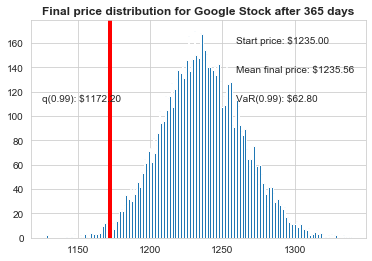

In [36]:
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')